In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input



In [12]:
# Dataset Path
BASE_DIR = "../dataset/plantvillage dataset/plantvillage dataset/color"

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    BASE_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 10144 images belonging to 14 classes.
Found 2532 images belonging to 14 classes.


In [3]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D


In [4]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # freeze base model


In [5]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Input layer
inputs = Input(shape=(224, 224, 3))

# Pass input through EfficientNet base
x = base_model(inputs, training=False)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Dense layer
x = Dense(128, activation='relu')(x)

# Dropout
x = Dropout(0.5)(x)

# Output layer (14 classes)
outputs = Dense(14, activation='softmax')(x)

# Final Model
model = Model(inputs, outputs)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                1806  

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
print("Model compiled successfully ✅")


Model compiled successfully ✅


In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


317/317 [==============================] - 1374s 4s/step - loss: 1.2730 - accuracy: 0.6354 - val_loss: 0.5018 - val_accuracy: 0.8859
Epoch 2/20
317/317 [==============================] - 1747s 6s/step - loss: 0.4941 - accuracy: 0.8627 - val_loss: 0.2588 - val_accuracy: 0.9431
Epoch 3/20
317/317 [==============================] - 812s 3s/step - loss: 0.3165 - accuracy: 0.9158 - val_loss: 0.1803 - val_accuracy: 0.9546
Epoch 4/20
317/317 [==============================] - 2826s 9s/step - loss: 0.2342 - accuracy: 0.9348 - val_loss: 0.1442 - val_accuracy: 0.9613
Epoch 5/20
317/317 [==============================] - 825s 3s/step - loss: 0.1895 - accuracy: 0.9471 - val_loss: 0.1221 - val_accuracy: 0.9676
Epoch 6/20
317/317 [==============================] - 869s 3s/step - loss: 0.1605 - accuracy: 0.9554 - val_loss: 0.1066 - val_accuracy: 0.9684
Epoch 7/20
317/317 [==============================] - 853s 3s/step - loss: 0.1419 - accuracy: 0.9593 - val_loss: 0.0966 - val_accuracy: 0

In [10]:
model.save("efficientnet_crop_disease_model.keras")


1/1 [==============================] - 3s 3s/step
Predicted Disease: Apple___Black_rot


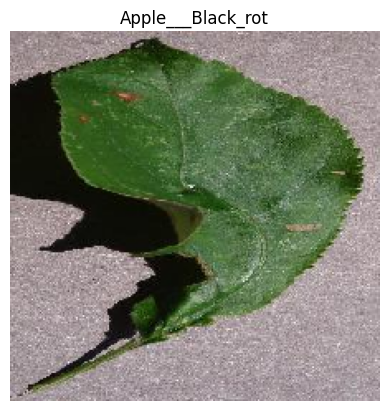

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# Load model
model = load_model("efficientnet_crop_disease_model.keras")

# Path of image
img_path = "../dataset/plantvillage dataset/plantvillage dataset/color/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG"

# Load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Prediction
pred = model.predict(img_array)
pred_class = np.argmax(pred)

class_names = list(train_generator.class_indices.keys())

print("Predicted Disease:", class_names[pred_class])

plt.imshow(img)
plt.title(class_names[pred_class])
plt.axis("off")
plt.show()


In [16]:
!pip install scikit-learn


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

val_generator.shuffle = False
val_generator.reset()

y_proba = model.predict(val_generator, verbose=1)

y_true = val_generator.classes
y_pred = np.argmax(y_proba, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average="macro"))
print("Recall (macro):", recall_score(y_true, y_pred, average="macro"))
print("F1 Score (macro):", f1_score(y_true, y_pred, average="macro"))

print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))


80/80 [==============================] - 120s 1s/step
Accuracy: 0.981042654028436
Precision (macro): 0.9749046184934863
Recall (macro): 0.9749746265105919
F1 Score (macro): 0.974900815385278

Confusion Matrix:
 [[122   0   1   3   0   0   0   0   0   0   0   0   0]
 [  0 124   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0  53   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0 325   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 300   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 210   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0 168   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  90   0  12   0   0   0]
 [  0   0   0   0   0   0   0   0 238   0   0   0   0]
 [  0   0   0   0   0   0   0  15   0 182   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 232   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 230   6]
 [  0   0   0   0   0   0   0   0   0   0   0   3 210]]

Classification Report:
               precision    recall  f1-score   su